# CEO-Request Challenge


🕵🏻 **Should Olist remove underperforming sellers from its marketplace ?**

## Problem statement

🕵🏻 To analyse the impact of removing the worse sellers from Olist's marketplace, we can start with a what-if analysis: What would have happened if Olist had never accepted these sellers in the first place? For that:

1️⃣ Compute, for each `seller_id`, and cumulated since the beginning:
- the `revenues` it brings
- the `costs` associated with all its bad reviews
- the resulting `profits` (revenues - costs)
- the number of `orders` (it will impact the overall IT costs)


2️⃣ We can then:
- sort sellers by increasing profits for Olist
- for each number of sellers to remove, compute the financial impact it would have made if they had never been accepted on the platform. 
- we may find an optimal number of sellers to remove that maximizes Olist's profit margin

👉 Write down a detailed strategy (step by step) to create the DataFrame you need for the first step.

💡Think about how to re-use or update the logic you've already coded in your 🗂 `olist` package

<details>
    <summary>- <i>Hints</i> -</summary>


Starting from your current `seller().get_training_data()` DataFrame, can you easily transform it to compute:
- Olist's positive `revenue_per_seller`? 
- Olist's `cost_of_bad_reviews`?

⚠️ Do no start from scratch ! Investigate your source code in `seller.py` : 
- how was the mean `review_score` per seller computed? 
- Can you think about  a way to update your code to incorporate the `cost_of_reviews`? 

</details>


## Your turn!

🧺 Keep this notebook tidy! 

📅 🗣 📊 You will present your insights to Olist's CEO next time, after the `Communicate your Data Analysis insights` day!

## Analyse data

### Import data

In [9]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import datetime
import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
# seller.py has been updated to seller_updated.py to automatically compute what we need for step (1)
from olist.seller_updated import Seller

# Import seller data
seller = Seller()

# "get_training_data" is a method applied to the dataframe that computes the profits per seller
sellers = seller.get_training_data()

# Keep only columns of interest
sellers = sellers[['seller_id','n_orders','profits']]

sellers.head()

,seller_id,n_orders,profits
0,3442f8959a84dea7ee197c632cb2df15,3,201.870
1,d1b65fc7debc3361ea86b5f14c68d2e2,40,2050.307
2,ce3ad9de960102d0677a81f5d0bb7b2d,1,15.800
3,c0f3eea2e14555b6faeea3dd58c1b1c3,1,7.999
4,51a04a8a6bdcb23deccc82b0b80742cf,1,-83.201


### Calculate cost constant A

In [11]:
# it_costs = A * (sellers['n_orders'].sum()**0.5)
it_costs = 500000

num_orders = sellers['n_orders'].sum()

A = it_costs / (num_orders**0.5)

A

1582.3973364219244

### Calculate IT total benefits

In [12]:
it_costs = A * (sellers['n_orders'].sum()**0.5)

benefit = sellers.profits.sum() - it_costs 

benefit

667608.4440000001

### Iteratively removing sellers

In [13]:
# Arrange from worst to best seller
sellers.sort_values(by='profits',inplace = True)
sellers.head()

,seller_id,n_orders,profits
769,6560211a19b47992c3666cc44a7e94c0,1854,-21519.517
2358,4a3ca9315b744ce9f8e9374361493884,1806,-17752.708
1357,cc419e0650a3c5ba77189a1882b7556a,1706,-17581.158
945,ea8482cd71df3c1969d7b9473ff13abc,1146,-15542.248
315,8b321bb669392f5163d04c59e235e066,943,-12886.431


In [14]:
# Iteratively removing worst sellers by slicing dataframe
sellers_removed = []
total_benefits = []

for i in range(len(sellers)):
    
    # Recalculate benefits
    benefits = sellers[i:].profits.sum() - A * (sellers[i:]['n_orders'].sum()**0.5)
    
    # Append recalculated profits and # of sellers removed to respective lists
    total_benefits.append(benefits)
    sellers_removed.append(i)

Text(0, 0.5, 'total benefits')

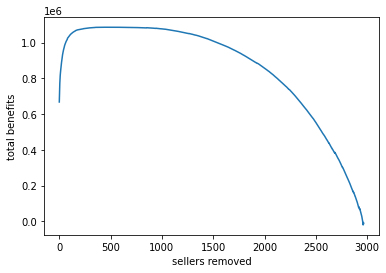

In [15]:
# Plot the bad boy
plt.plot(sellers_removed,total_benefits)
plt.xlabel('sellers removed')
plt.ylabel('total benefits')

In [ ]:
### best_sellers = seller_df.copy().sort_values(by='profits',ascending=True).reset_index(drop=True)
# total_profit = []
# total_profit.append(best_sellers['profits'].sum())
# for n in range(len(best_sellers)):
#     best_sellers.drop(n,inplace=True)
#     total_profit.append(best_sellers['profits'].sum())